# Sistemas de ecuaciones lineales

Comenzamos por un caso sencillo:

$$
\begin{align}
x-2y &= 1
\\
3x+2y &= 11
\end{align}
$$

## 1. Primera solución, método gráfico

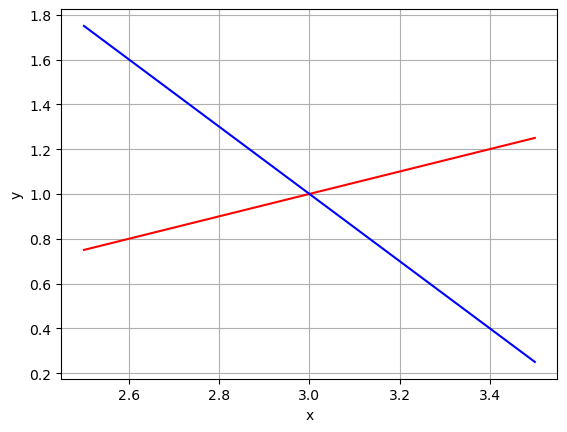

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(2.5,3.5,100)

y1 = (x-1)/2
y2 = (11-3*x)/2

plt.plot(x,y1,'r-')
plt.plot(x,y2, 'b-')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

In [30]:
import scipy.linalg as scl
a = np.array([
    [1., -2.],
    [3., 2.]
   ])

b = np.array([[1],
              [11]])

x = scl.solve(a,b)

for i in range(len(x)):
    print(f'x[{i+1}] = {x[i,0]:.2f}')

# si quereos printear llaves y no corchetes hay que duplicar:

for i in range(len(x)):
    print(f'x{{{i+1}}} = {x[i,0]:.2f}')


x[1] = 3.00
x[2] = 1.00
x{1} = 3.00
x{2} = 1.00


Otra forma de resolverlo es factorizar la matriz del sistema como una matriz triangular inferior y otra superior $$M=LU$$ de forma que se pueda aplicar eliminación gaussiana.

In [34]:
import scipy.linalg as scl
a = np.array([
    [1., -2.],
    [3., 2.]
   ])

b = np.array([[1],
              [11]])

x = np.dot(scl.inv(a),b)

for i in range(len(x)):
    print(f'x[{i+1}] = {x[i,0]:.2f}')

x[1] = 3.00
x[2] = 1.00


# Mínimos cuadrados

chi2 = 0.014808076191943288
Syx = 0.013239371597953834
ybar = 1.6052525364444985
St = 628.5758126032371
r^2 = 0.9999764418612759
R = 0.9999882208612639
A = [20.57292745 -8.2265144   0.44999349  0.0943378 ]
sA = [4.68797964e+00 2.40852170e+00 1.30173244e-01 7.10709833e-04]


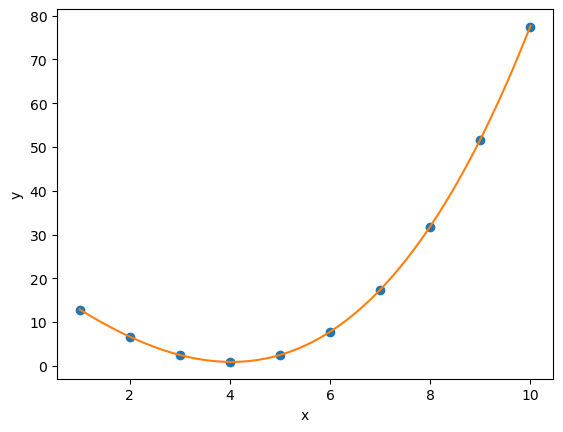

In [2]:
import numpy as np
import matplotlib.pyplot as plt

fichero = 'data2c.txt'
n = 3 # orden del polimonmio

data = np.loadtxt(fichero)

if len(data.T) == 3:
    x, y, s = data.T
else:
    x, y = data.T
    s = 1
#s = 1 # ignorando incertidumbres

plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')

N = len(x)

a = np.zeros((n+1, N))
b = (y/s).T
for i in range(n+1):

    a[i] = x**i/s

C = np.dot(a,a.T)
B = np.dot(a,b)

A = np.dot(np.linalg.inv(C), B).T #coeficientes del polinomio


ypred = 0
for i in range(n+1):

    ypred += A[i]*x**i

chi2 = np.sum((y-ypred)**2/s**2)


Syx = np.sqrt(N * chi2/((N-n-1)*np.sum(1/s**2)))

ybar = np.sum(y/s**2)/np.sum(1/s**2)

St = np.sum((y-ybar)**2/s**2)

r2 = (St - chi2)/St

R = np.sqrt(r2)

print(f'chi2 = {chi2}')
print(f'Syx = {Syx}')
print(f'ybar = {ybar}')
print(f'St = {St}')
print(f'r^2 = {r2}')
print(f'R = {R}')

if len(data.T) == 3:

    sA = np.diag(np.linalg.inv(C))
else:
    sA = Syx * np.diag(np.linalg.inv(C))
print(f'A = {A}')
print(f'sA = {sA}')


xp = np.linspace(min(x), max(x), 100)
yp=0
for i in range(n+1):
    yp += A[i]*xp**i

plt.plot(xp,yp)
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt

datos = np.loadtxt('data2c.txt')
n = 3

x,y,s = datos.T

s = np.ones(len(x))

C = np.zeros((n+1, n+1))
C1 = np.zeros((n+1, n+1))

B = np.zeros(n+1)

for i in range(0, n+1):

    B[i] = sum(y*x**i/s**2)

    for j in range(0, n+1):

        C[i, j] = sum(x**(i+j)/s**2)

B

array([   211.6,   1713.1,  15245.3, 139627.9])